In [39]:
from tbparse import SummaryReader


In [40]:
from pathlib import Path
from tbparse import SummaryReader
from tqdm import tqdm
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from itertools import groupby
import pandas as pd

# POLICIES=list(Path("/Users/jszulc/Desktop/outputs/eureka/2024-07-03_20-53-07").rglob("policy*"))
METRIC = "consecutive_successes"
SAMPLES_PER_ITER=3

def parse_events(events):

    # e = tensorboard.data.experimental.ExperimentFromDev(POLICIES[0].as_posix)
    d = {}

    date_re = re.compile(r"(\d{4}-\d{2}-\d{2}_\d{2}-\d{2}-\d{2})")
    def get_date(s):
        match = date_re.search(s)
        return datetime.strptime(match.group(1), "%Y-%m-%d_%H-%M-%S")

    for e in tqdm(events):
        policy_parent = e.parent.parent.parent.parent
        date = get_date(policy_parent.name)
        df = SummaryReader(e.as_posix()).scalars
        if df.empty:
            continue
        d[date] = df[df["tag"] == METRIC]

    _, values_per_sample = zip(*sorted(d.items()))
    for i, df in enumerate(values_per_sample):
        df["sample"] = i
        df["iter"] = df["sample"] // SAMPLES_PER_ITER

    return pd.concat(values_per_sample)

In [41]:
BW = list(Path("/Users/jszulc/Desktop/misha/bezwykresow").rglob("events*"))
ebw = parse_events(BW)

100%|██████████| 9/9 [00:12<00:00,  1.34s/it]


In [42]:
ebw

,step,tag,value,sample,iter
3000,1,consecutive_successes,0.000000,0,0
3001,2,consecutive_successes,0.000000,0,0
3002,3,consecutive_successes,0.002225,0,0
3003,4,consecutive_successes,0.004319,0,0
3004,5,consecutive_successes,0.005495,0,0
...,...,...,...,...,...
5995,2996,consecutive_successes,0.767027,6,2
5996,2997,consecutive_successes,0.853602,6,2
5997,2998,consecutive_successes,0.871017,6,2
5998,2999,consecutive_successes,0.813265,6,2


In [43]:
ZW = list(Path("/Users/jszulc/Desktop/misha/zwykresami").rglob("events*"))
ezw = parse_events(ZW)
ezw

100%|██████████| 9/9 [00:16<00:00,  1.83s/it]


,step,tag,value,sample,iter
3000,1,consecutive_successes,0.000000,0,0
3001,2,consecutive_successes,0.000000,0,0
3002,3,consecutive_successes,0.002243,0,0
3003,4,consecutive_successes,0.005333,0,0
3004,5,consecutive_successes,0.007311,0,0
...,...,...,...,...,...
6022,2005,consecutive_successes,0.002367,8,2
6023,2006,consecutive_successes,0.006644,8,2
6024,2007,consecutive_successes,0.005203,8,2
6025,2008,consecutive_successes,0.004602,8,2


In [44]:
ezw.describe()

,step,value,sample,iter
count,23958.000000,23958.000000,23958.000000,23958.000000
mean,1377.419901,0.004571,3.609358,0.873028
std,834.793334,0.004668,2.467123,0.779901
min,1.000000,0.000000,0.000000,0.000000
25%,666.000000,0.001650,1.000000,0.000000
50%,1331.500000,0.003490,3.000000,1.000000
75%,2036.750000,0.005978,5.000000,1.000000
max,3000.000000,0.119753,8.000000,2.000000


In [45]:
ezw = ezw.groupby(["iter", "step"]).agg({"value": "max"})["value"].reset_index()["value"]
ebw = ebw.groupby(["iter", "step"]).agg({"value": "max"})["value"].reset_index()["value"]
ezw = ezw[:len(ebw)]
ebw = ebw[:len(ezw)]

In [46]:
ezw

0       0.000000
1       0.000000
2       0.002261
3       0.005333
4       0.007311
          ...   
8237    0.003591
8238    0.001546
8239    0.005728
8240    0.006451
8241    0.002777
Name: value, Length: 8242, dtype: float64

In [47]:
ebw

0       0.000000
1       0.000000
2       0.002261
3       0.005386
4       0.006278
          ...   
8237    0.537612
8238    0.501150
8239    0.680182
8240    0.490247
8241    0.474475
Name: value, Length: 8242, dtype: float64

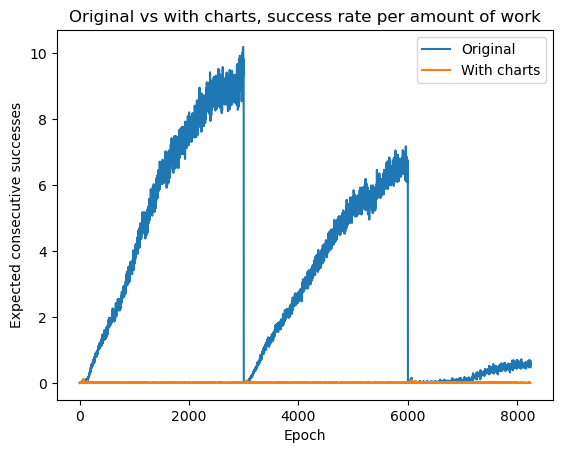

In [48]:
ebw.plot()
ezw.plot()
plt.xlabel("Epoch")
plt.ylabel("Expected consecutive successes")
plt.legend(["Original", "With charts"])
plt.title("Original vs with charts, success rate per amount of work")
# import matplotlib.pyplot as plt

# Your code to generate the plot

plt.savefig('plot.tex', format='pgf')

In [49]:
ezw

0       0.000000
1       0.000000
2       0.002261
3       0.005333
4       0.007311
          ...   
8237    0.003591
8238    0.001546
8239    0.005728
8240    0.006451
8241    0.002777
Name: value, Length: 8242, dtype: float64

In [50]:
do.groupby(["iter", "step"]).agg({"value": "max"})["value"].plot()

NameError: name 'do' is not defined

In [ ]:
l = list(list(d)[0])

In [ ]:
list(l[1])

[]

In [ ]:
np.load("summary.npz")["max_successes"]

array([0.09825404, 0.19749887, 0.2719349 , 0.33701089, 0.48076636,
       0.77956581, 0.83165854, 0.86254984, 1.08933353, 1.03708398,
       1.16976833])